---
title: 'Analysing Facebook data with R'
author: "Kanav Katyal"
date: "March 25, 2016"
output: 
  html_document
---


# 1. Introduction
The goal of this report is to analyse facebook data using facebook API and R.The data on the facebook can be analysed with R or Python but this report focuses on R. The way this goes is by connecting your R to facebook API. After a succesfull connection is made we can extract data from public pages,posts, froups or public profiles. Although facebook has put alot of restrictions on their latest update of  API's due to privacy issues still this is possible.

So there are basically two ways to connect to the API,Via an app or via a temporary token.
Using the app has an advantage that this is valid for atleast two months, but the process of creating an app and then connecting it to your R console is more complicated than compared to a temporary token.Also you won´t get all the data available via this method.

The connection via the temporary token is much more easier and will give you more data but the token is only valid for 2 hours. After 2 hours the token has to be refreshed and the new token has to be used. Also you have to be always logged in for doing this analysis. In further section we will look on how to connect R to facebook API via a temporary authentication token.




# 2. Connecting R to Facebook
Before doing anything you need to login to our facebook account. After that we have to install the package Rfacebook and devtools. Rfacebook package provides a series of functions that allow R users to access Facebook's API to get information about public pages, groups, and posts, as well as some of the authenticated user's private data. Authenticated user here means the user who is logged in. 
Rfacebook is being installed from github because the latest version of this package is available on github itself.


In [20]:

install.packages("devtools" , repos = "http://cran.us.r-project.org")
library(devtools)
install.packages("Rfacebook",repos = "http://cran.us.r-project.org")
require(Rfacebook)
install.packages("base")





Installing package into 'C:/Users/Kanav/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'devtools' is in use and will not be installed"Installing package into 'C:/Users/Kanav/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'Rfacebook' is in use and will not be installed"Installing package into 'C:/Users/Kanav/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


After installing these packages the API request needs an authentication token through which it will be having access.There are two ways of making authenticated requests with Rfacebook. One of the option is to generate a temporary token on the Graph API Explorer.Then just copy and paste that token into the R console and save it as a string vector to be passed as an argument to any function in the Rfacebook package.

For generating the token you need to go on this link
token generated here: https://developers.facebook.com/tools/explorer 
As this page will open you can see an access token tab and just copy it. If there is no access token then on the top right corenr of the page there is a tab for "Get Token". If you will click on it, a new token with be generated.




In [10]:



token <- 'EAACEdEose0cBAMt3wzCSDZAUv0LCrZAz0kj6zNIDQ5luiCb59ieWfk5aB3KCcnZBw8eHbT5CDukwpKd8w3UmmOWG0g5mPymydXUhiWj6SFHDU4G6qlDXNKayoDLqkLThXrLrGIBD5AbZAmsVZBKj4lc48LkxN8m1u1Kq8b77oBy2uFcZC1icIUxEZCI6vKYZAR8ZD'
me <- getUsers("me", token, private_info=TRUE)
me$name
me$username
me$gender
me$birthday
me$location


[1] "Kanav Katyal"

[1] NA

[1] "male"

[1] "01/30/1991"

[1] "Boston, Massachusetts"

# 3. Analyising data from facebook

## 3.1 Analyising posts on public pages
Now lets look at posts that are being posted to a public page since it was craeted. To get all the data of the posts there is a function called 'getPage' in Rfacebook package which returns all the posts from that page. The constraint here is still the same that the page should be public.
Here is the usage of this function getPage('page', token, n = 1000) where,
page is the name of the facebook page 
token is our authentication code which we have saved it as a string vector and 
n is the number of posts that we want to extract.We put n eaqual to alarge number so that we can get all the posts though it changes from page to page.

Note: Everything on the facebook has a facebook id which can be found out at https://findmyfbid.com/. In place of 'page' facebook id of that page can also be used.


There is a page on facebook for the Bentley Analytics Society and I am fetching all its post since the day it was created to further analyse them.

In [11]:
BAS = getPage('bentleyAS', token, n=500)

25 posts 50 posts 75 posts 100 posts 125 posts 150 posts 175 posts 200 posts 225 posts 250 posts 275 posts 294 posts 

As it can seen that this page has a total 294 post since the day it was created. The getPage function extracts all the posts from a public page and converts all the data into a data frame in R. The BAS data frame can be seen as follows. Also we have printed only first 10 rows of this data frame by using head function to see how it looks like.

In [45]:
head(BAS,10)


from_id,from_name,message,created_time,type,link,id,story,likes_count,comments_count,shares_count,datetime,month
552009928274198,Bentley Analytics Society,NA,2017-05-14T01:44:21+0000,link,http://p.migdal.pl/2017/04/30/teaching-deep-learning.html,552009928274198_954046924737161,Bentley Analytics Society shared a link.,0,0,1,2017-05-14 01:44:21,2017-05
552009928274198,Bentley Analytics Society,Should keep you busy this summer,2017-05-13T17:55:03+0000,video,https://www.facebook.com/MITOCW/videos/10154371120331857/,552009928274198_953873701421150,Bentley Analytics Society shared MIT OpenCourseWare's video.,1,0,0,2017-05-13 17:55:03,2017-05
552009928274198,Bentley Analytics Society,ICYMI,2017-04-30T21:35:42+0000,link,https://www.eventbrite.com/e/odsc-east-2017-career-fair-tickets-32893161331?discount=CAREERS&hs_fb_account_id=1596173980647844&hs_fb_campaign_id=6093754420720&hs_fb_adset_id=6093754426320&hs_fb_ad_id=6093754434120&hs_parent_creative_id=6093754432120&source=fb&utm_source=facebook&utm_medium=paid,552009928274198_946294362179084,NA,1,0,0,2017-04-30 21:35:42,2017-04
552009928274198,Bentley Analytics Society,NA,2017-04-27T04:08:57+0000,link,https://opendatascience.com/blog/data-wrangling-cheatsheet-2/,552009928274198_943437629131424,Bentley Analytics Society shared a link.,2,1,2,2017-04-27 04:08:57,2017-04
552009928274198,Bentley Analytics Society,"Neal Kumar, CEO of Cognitir reached out to us to let you guys know about this workshop on SQL. The event is being hosted at MIT. Register while there is time!!",2017-04-07T01:50:25+0000,link,http://www.cognitir.com/sloan,552009928274198_929607553847765,NA,3,0,0,2017-04-07 01:50:25,2017-04
552009928274198,Bentley Analytics Society,Hand-picked for you,2017-02-28T01:35:15+0000,link,https://www.quora.com/In-laymans-terms-how-does-Naive-Bayes-work#,552009928274198_907237526084768,NA,2,1,0,2017-02-28 01:35:15,2017-02
552009928274198,Bentley Analytics Society,NA,2017-02-24T04:12:56+0000,link,https://soundcloud.com/amr-ali-78/sets/superdatascience,552009928274198_904976646310856,Bentley Analytics Society shared a link.,2,0,0,2017-02-24 04:12:56,2017-02
552009928274198,Bentley Analytics Society,Thank us later!!,2017-02-23T02:00:54+0000,link,http://www.slideshare.net/askroll/unsupervised-learning,552009928274198_904326289709225,NA,0,0,0,2017-02-23 02:00:54,2017-02
552009928274198,Bentley Analytics Society,"There, you have it!",2017-02-20T23:17:38+0000,link,https://www.r-bloggers.com/should-i-learn-r-or-python-it-doesnt-matter/,552009928274198_903062403168947,NA,4,0,0,2017-02-20 23:17:38,2017-02
552009928274198,Bentley Analytics Society,It's only Monday but remember that Bayes Workshop last semester? #throwback,2017-02-14T02:18:32+0000,link,https://www.r-bloggers.com/video-introduction-to-bayesian-data-analysis-part-1-what-is-bayes/,552009928274198_898733023601885,Bentley Analytics Society shared R bloggers's post.,0,0,0,2017-02-14 02:18:32,2017-02


# 3.2 Analysing popularity of posts
As shown above every post on a page has a count of number of likes, comments and shares. By using all these 3 measures we can find out the popularity of each post and overall the popularity of the page. Following code can be used to do this

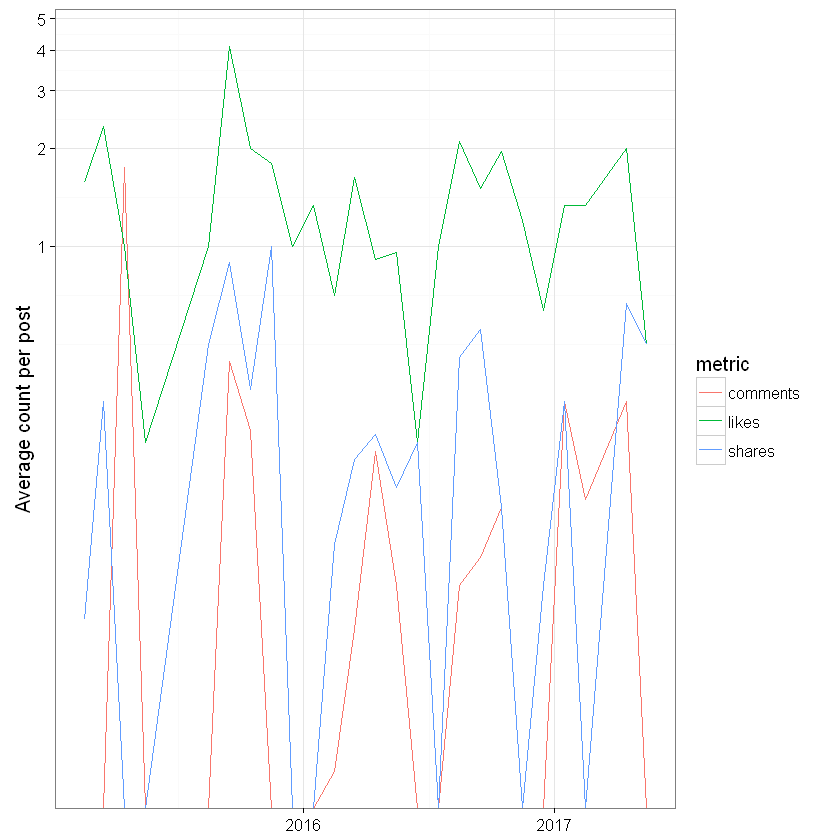

In [44]:
format.facebook.date <- function(datestring) {
  date <- as.POSIXct(datestring, format = "%Y-%m-%dT%H:%M:%S+0000", tz = "GMT")
}
## aggregate metric counts over month
aggregate.metric <- function(metric) {
  m <- aggregate(BAS[[paste0(metric, "_count")]], list(month = BAS$month), 
                 mean)
  m$month <- as.Date(paste0(m$month, "-15"))
  m$metric <- metric
  return(m)
}
# create data frame with average metric counts per month
BAS$datetime <- format.facebook.date(BAS$created_time)
BAS$month <- format(BAS$datetime, "%Y-%m")
df.list <- lapply(c("likes", "comments", "shares"), aggregate.metric)
df <- do.call(rbind, df.list)
# visualize evolution in metric
library(ggplot2)
library(scales)
ggplot(df, aes(x = month, y = x, group = metric)) + geom_line(aes(color = metric)) + 
  scale_x_date(date_breaks = "years", labels = date_format("%Y")) + scale_y_log10("Average count per post",breaks = c(1,2,3,4,5)) + theme_bw() + theme(axis.title.x = element_blank())

First we created two functions, firstly "format.facebook.date" and second "aggregate.metric". The first one is for extracting the date in a foprmat of year, month & day from created_time variable in BAS dataframe and second funtion calculates the mean for count of likes, shares & comments month wise.
After that average metric counts for all three metrics are added to the dataframe BAS. Further a visualisation is done using ggplot2 library.

As it can seen from the plot that the Business Analytics Page (BAS) is not much poplular as the mean value of count of likes,shares and comments per month is really low. Some post did not even got a single like or comment and some never got shared. 

Based on these results it can be infered that not much of the people come on this page and like or comment on the posts. The creator and the society needs to take action on this so that they can make their page more polular.